In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [76]:
df = pd.read_csv('data/City_Owned_and_Leased_Property__COLP__20250330.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17395 entries, 0 to 17394
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   BOROUGH                        17395 non-null  int64  
 1   TAX BLOCK                      17395 non-null  int64  
 2   TAX LOT                        17395 non-null  int64  
 3   BBL                            17395 non-null  int64  
 4   BILLBBL                        17395 non-null  int64  
 5   CD                             17392 non-null  float64
 6   HOUSE NUMBER                   9443 non-null   object 
 7   STREET NAME                    16658 non-null  object 
 8   ADDRESS                        16658 non-null  object 
 9   PARCEL NAME                    13666 non-null  object 
 10  AGENCY                         17395 non-null  object 
 11  USE CODE                       17395 non-null  int64  
 12  USE TYPE                       17395 non-null 

,BOROUGH,TAX BLOCK,TAX LOT,BBL,BILLBBL,CD,USE CODE,CATEGORY,EXPANDED CATEGORY CODE,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE
count,17395.000000,17395.000000,17395.000000,1.739500e+04,1.739500e+04,17392.000000,17395.000000,17393.000000,17342.000000,1.739500e+04,17395.000000,17395.000000,17395.000000
mean,3.301983,4709.936016,97.842254,3.349083e+09,3.349083e+09,337.199862,827.739983,1.463520,4.948161,9.963852e+05,189903.503191,40.687839,-73.956137
std,1.318112,4153.636190,453.401635,1.333949e+09,1.333949e+09,132.013505,524.378664,0.800008,2.523203,3.524192e+04,35698.991217,0.098009,0.126976
min,1.000000,1.000000,1.000000,1.000020e+09,1.000020e+09,101.000000,100.000000,1.000000,1.000000,9.134480e+05,120146.000000,40.496171,-74.254614
25%,2.000000,1756.500000,9.000000,2.049475e+09,2.049475e+09,210.000000,440.000000,1.000000,3.000000,9.822650e+05,159878.500000,40.605463,-74.007159
50%,3.000000,3541.000000,31.000000,3.072080e+09,3.072080e+09,316.000000,472.000000,1.000000,3.000000,1.002082e+06,188446.000000,40.683898,-73.935592
75%,4.000000,6473.000000,70.000000,4.159630e+09,4.159630e+09,414.000000,1410.000000,2.000000,8.000000,1.019604e+06,216682.500000,40.761397,-73.872266
max,5.000000,16350.000000,9878.000000,5.080400e+09,5.080400e+09,595.000000,1900.000000,3.000000,9.000000,1.066854e+06,270758.000000,40.909810,-73.701927


DATA PREPROCESSING

In [79]:
#target variable TAX BLOCK
df_cleaned = df.dropna(subset=['TAX BLOCK'])


categorical_columns = ['BOROUGH', 'PARCEL NAME', 'STREET NAME']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))  
    label_encoders[col] = le
df

,BOROUGH,TAX BLOCK,TAX LOT,BBL,BILLBBL,CD,HOUSE NUMBER,STREET NAME,ADDRESS,PARCEL NAME,...,EXPANDED CATEGORY CODE,EXPANDED CATEGORY DESCRIPTION,LEASED PROPERTIES,FINAL COMMITMENT,AGREEMENT,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,GEOM
0,3,7071,200,3070710200,3070710200,313.0,NaN,NaN,NaN,FORD AMPHITHEATER,...,8.0,PROPERTY WITH NO USE,NaN,NaN,NaN,987334,147856,40.572506,-73.988899,POINT (-73.988899 40.572506)
1,3,2134,126,3021340126,3021340126,301.0,NaN,KENT AVENUE,KENT AVENUE,NaN,...,8.0,PROPERTY WITH NO USE,NaN,NaN,NaN,992515,197549,40.708900,-73.970189,POINT (-73.970189 40.7089)
2,2,5519,150,2055190150,2055190150,210.0,NaN,SHORE DRIVE,SHORE DRIVE,NaN,...,8.0,PROPERTY WITH NO USE,NaN,NaN,NaN,1038387,237689,40.818911,-73.804408,POINT (-73.804408 40.818911)
3,1,2,23,1000020023,1000020023,101.0,NaN,SOUTH STREET,SOUTH STREET,PIER 6,...,8.0,PROPERTY WITH NO USE,NaN,D,NaN,981687,194732,40.701171,-74.009243,POINT (-74.009243 40.701171)
4,3,8591,200,3085910200,3085910200,318.0,NaN,NaN,NaN,NaN,...,8.0,PROPERTY WITH NO USE,NaN,NaN,NaN,1008856,158681,40.602185,-73.911390,POINT (-73.91139 40.602185)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17390,1,596,1002,1005961002,1005967501,102.0,500,WASHINGTON STREET,500 WASHINGTON STREET,MANHATTAN 1/2/5 GARAGES,...,7.0,"MAINTENANCE, STORAGE, & INFRASTRUCTURE USE",NaN,NaN,NaN,981412,204078,40.726823,-74.010239,POINT (-74.010239 40.726823)
17391,4,15962,19,4159620019,4159620019,414.0,NaN,BEACH 44 STREET,BEACH 44 STREET,EDGEMERE URBAN RENEWAL AREA (PART OF SITES 58...,...,8.0,PROPERTY WITH NO USE,NaN,D,NaN,1046450,158045,40.600255,-73.776014,POINT (-73.776014 40.600255)
17392,3,346,3,3003460003,3003460003,306.0,59,HAMILTON AVENUE,59 HAMILTON AVENUE,RED HOOK CONTAINER TERMINAL,...,8.0,PROPERTY WITH NO USE,NaN,D,NaN,982582,188439,40.683898,-74.006014,POINT (-74.006014 40.683898)
17393,3,8141,125,3081410125,3081410125,318.0,NaN,REMSEN AVENUE,REMSEN AVENUE,NaN,...,8.0,PROPERTY WITH NO USE,NaN,NaN,NaN,1009379,173899,40.643954,-73.909450,POINT (-73.90945 40.643954)


DATA VISUALIZATION

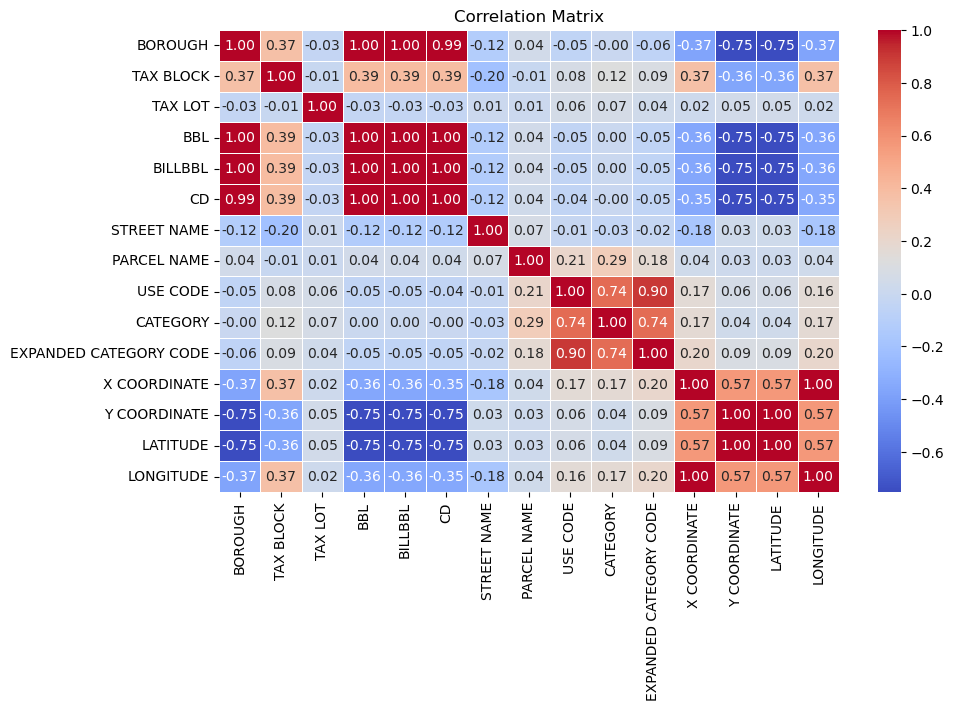

In [82]:
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

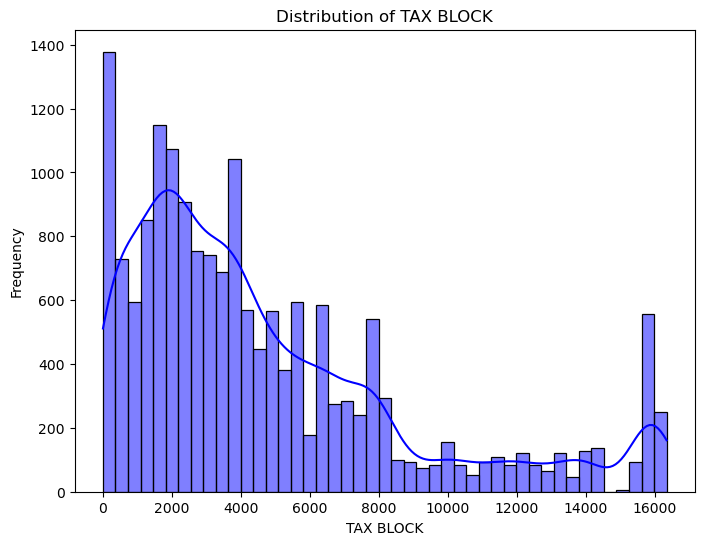

In [83]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['TAX BLOCK'], kde=True, color='blue')
plt.title('Distribution of TAX BLOCK')
plt.xlabel('TAX BLOCK')
plt.ylabel('Frequency')
plt.show()

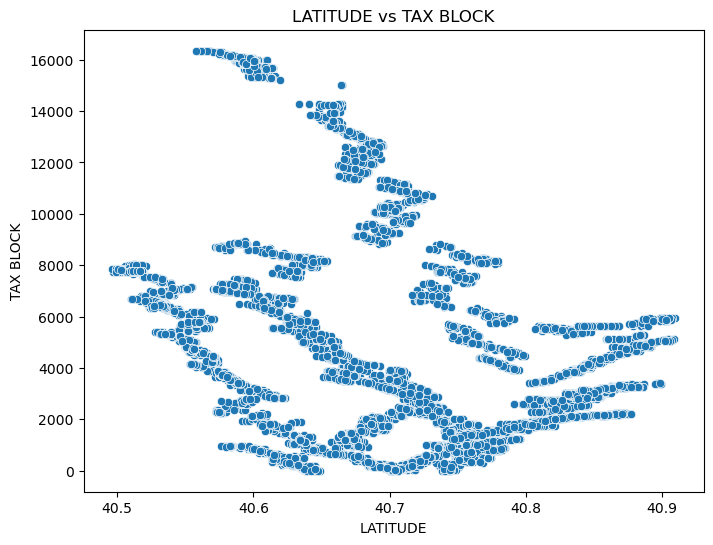

In [85]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['LATITUDE'], y=df_cleaned['TAX BLOCK'])
plt.title('LATITUDE vs TAX BLOCK')
plt.xlabel('LATITUDE')
plt.ylabel('TAX BLOCK')
plt.show()

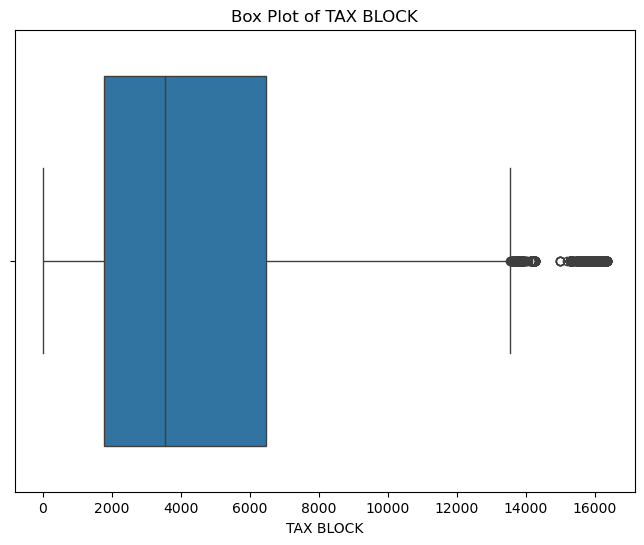

In [88]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['TAX BLOCK'])
plt.title('Box Plot of TAX BLOCK')
plt.xlabel('TAX BLOCK')
plt.show()

REGRESSION ANALYSIS

In [91]:
X = df_cleaned[['LATITUDE', 'LONGITUDE', 'BOROUGH', 'USE CODE']]  
y = df_cleaned['TAX BLOCK']  

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Value: {r2}")
print(f"Mean Squared Error: {mse}")

R² Value: 0.6163592973646308
Mean Squared Error: 6542614.259344017


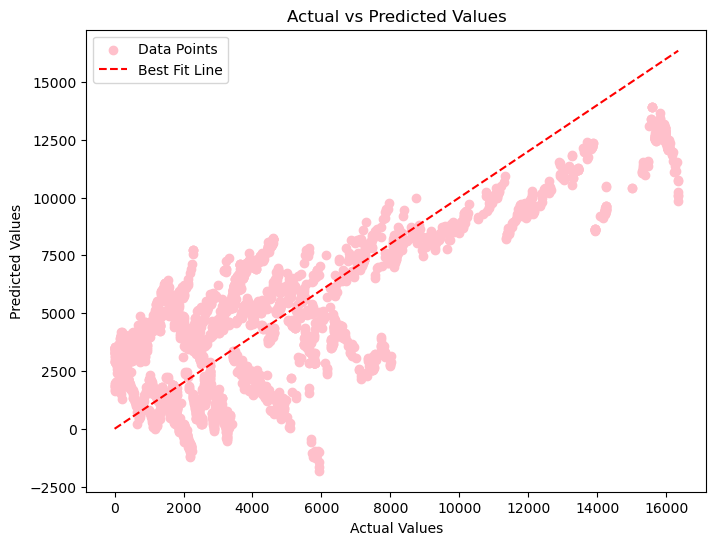

In [93]:
# Plotting Actual vs Predicted Values with the Best Fit Line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='pink', label='Data Points')  # Scatter plot of actual vs predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Best Fit Line')  # Best fit line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()